In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)  
import cufflinks as cf  
cf.go_offline() 
import os
df = pd.read_csv('kappa.csv')
df.head()

,Blocks,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,0,8935.129999,11324.846750,36744.68701,1488415,7680.534210,541483.280,3851.421
1,1,5707.716500,7418.678597,27611.16400,1379264,5653.453131,354889.084,2348.056
2,2,5061.044500,6997.726300,27750.11900,1473126,5759.866828,334956.914,1929.238
3,3,6316.408000,8276.083952,30427.82400,1414024,6297.255196,395851.613,2478.500
4,4,6556.777500,8483.024968,29363.04000,1407522,6128.348046,405681.451,2684.672


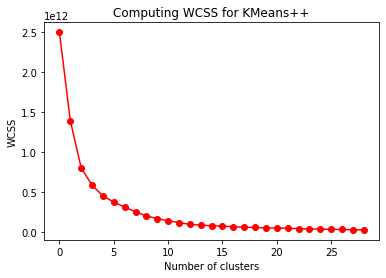

In [16]:
vals = df.iloc[ :, 1:].values

from sklearn.cluster import KMeans
# Use the Elbow method to find a good number of clusters using WCSS
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
x = df.drop(['Blocks'],axis=1).values
y = df['Blocks'].values

In [18]:
km = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict(x)

ValueError: `dataset` input should have multiple elements.

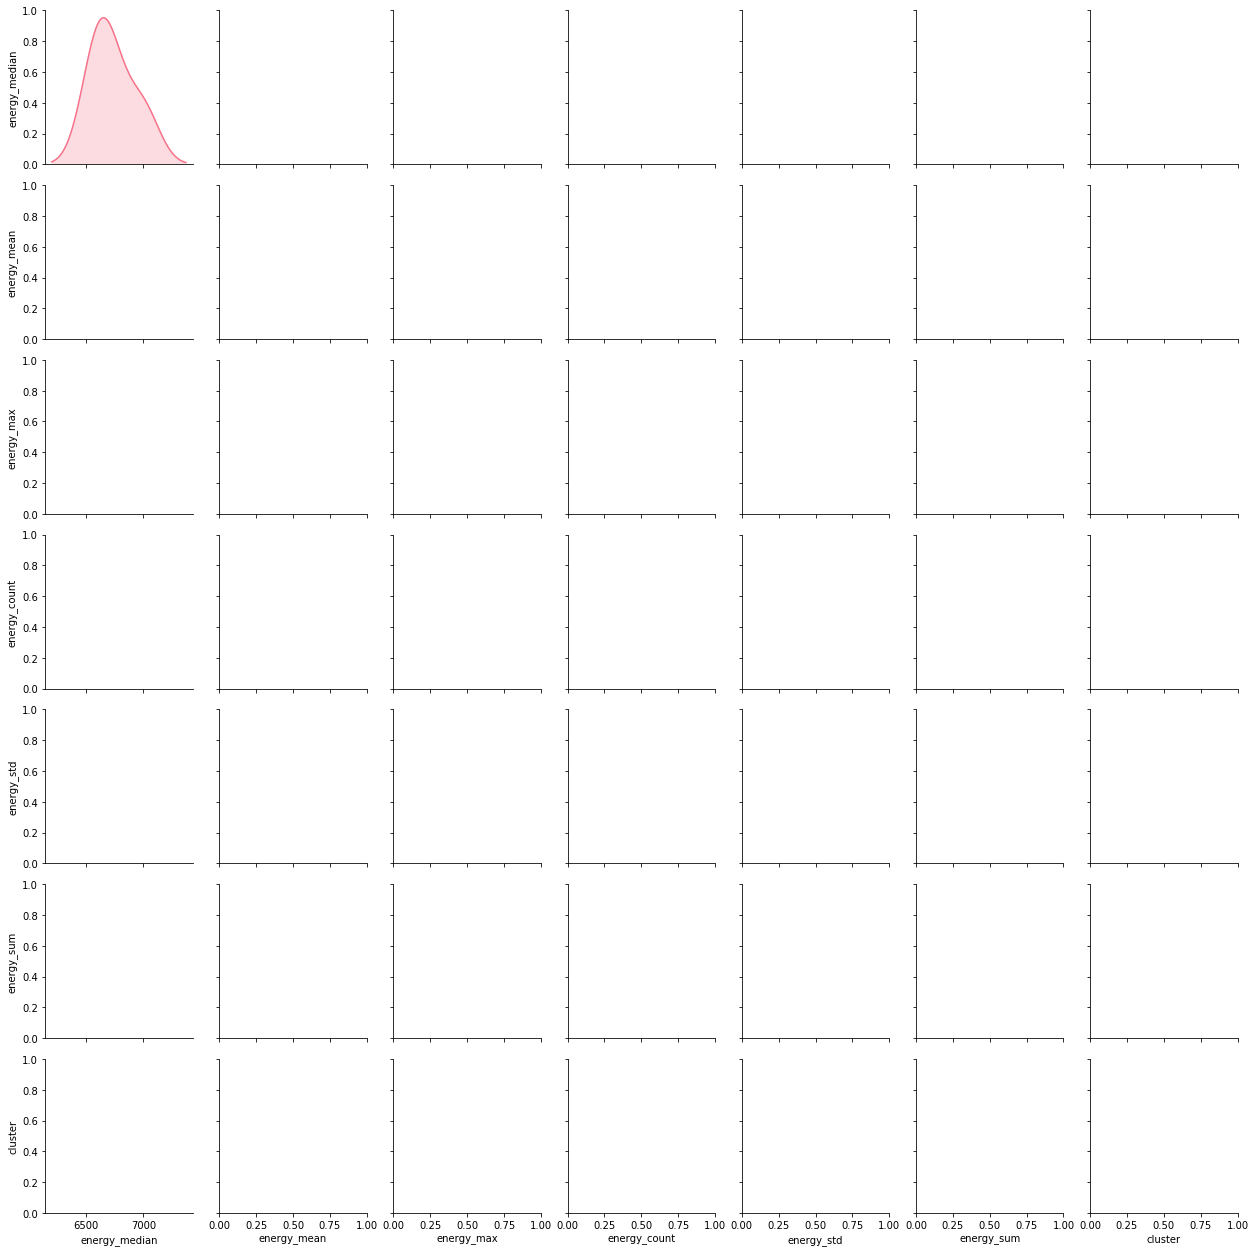

In [13]:
df["cluster"] = y_pred
cols = list(df.columns)
cols.remove("Blocks")

sns.pairplot( df[ cols ], hue="cluster")

In [21]:
df["cluster"] = y_pred
cols = list(df.columns)
cols.remove("Blocks")


ValueError: `dataset` input should have multiple elements.

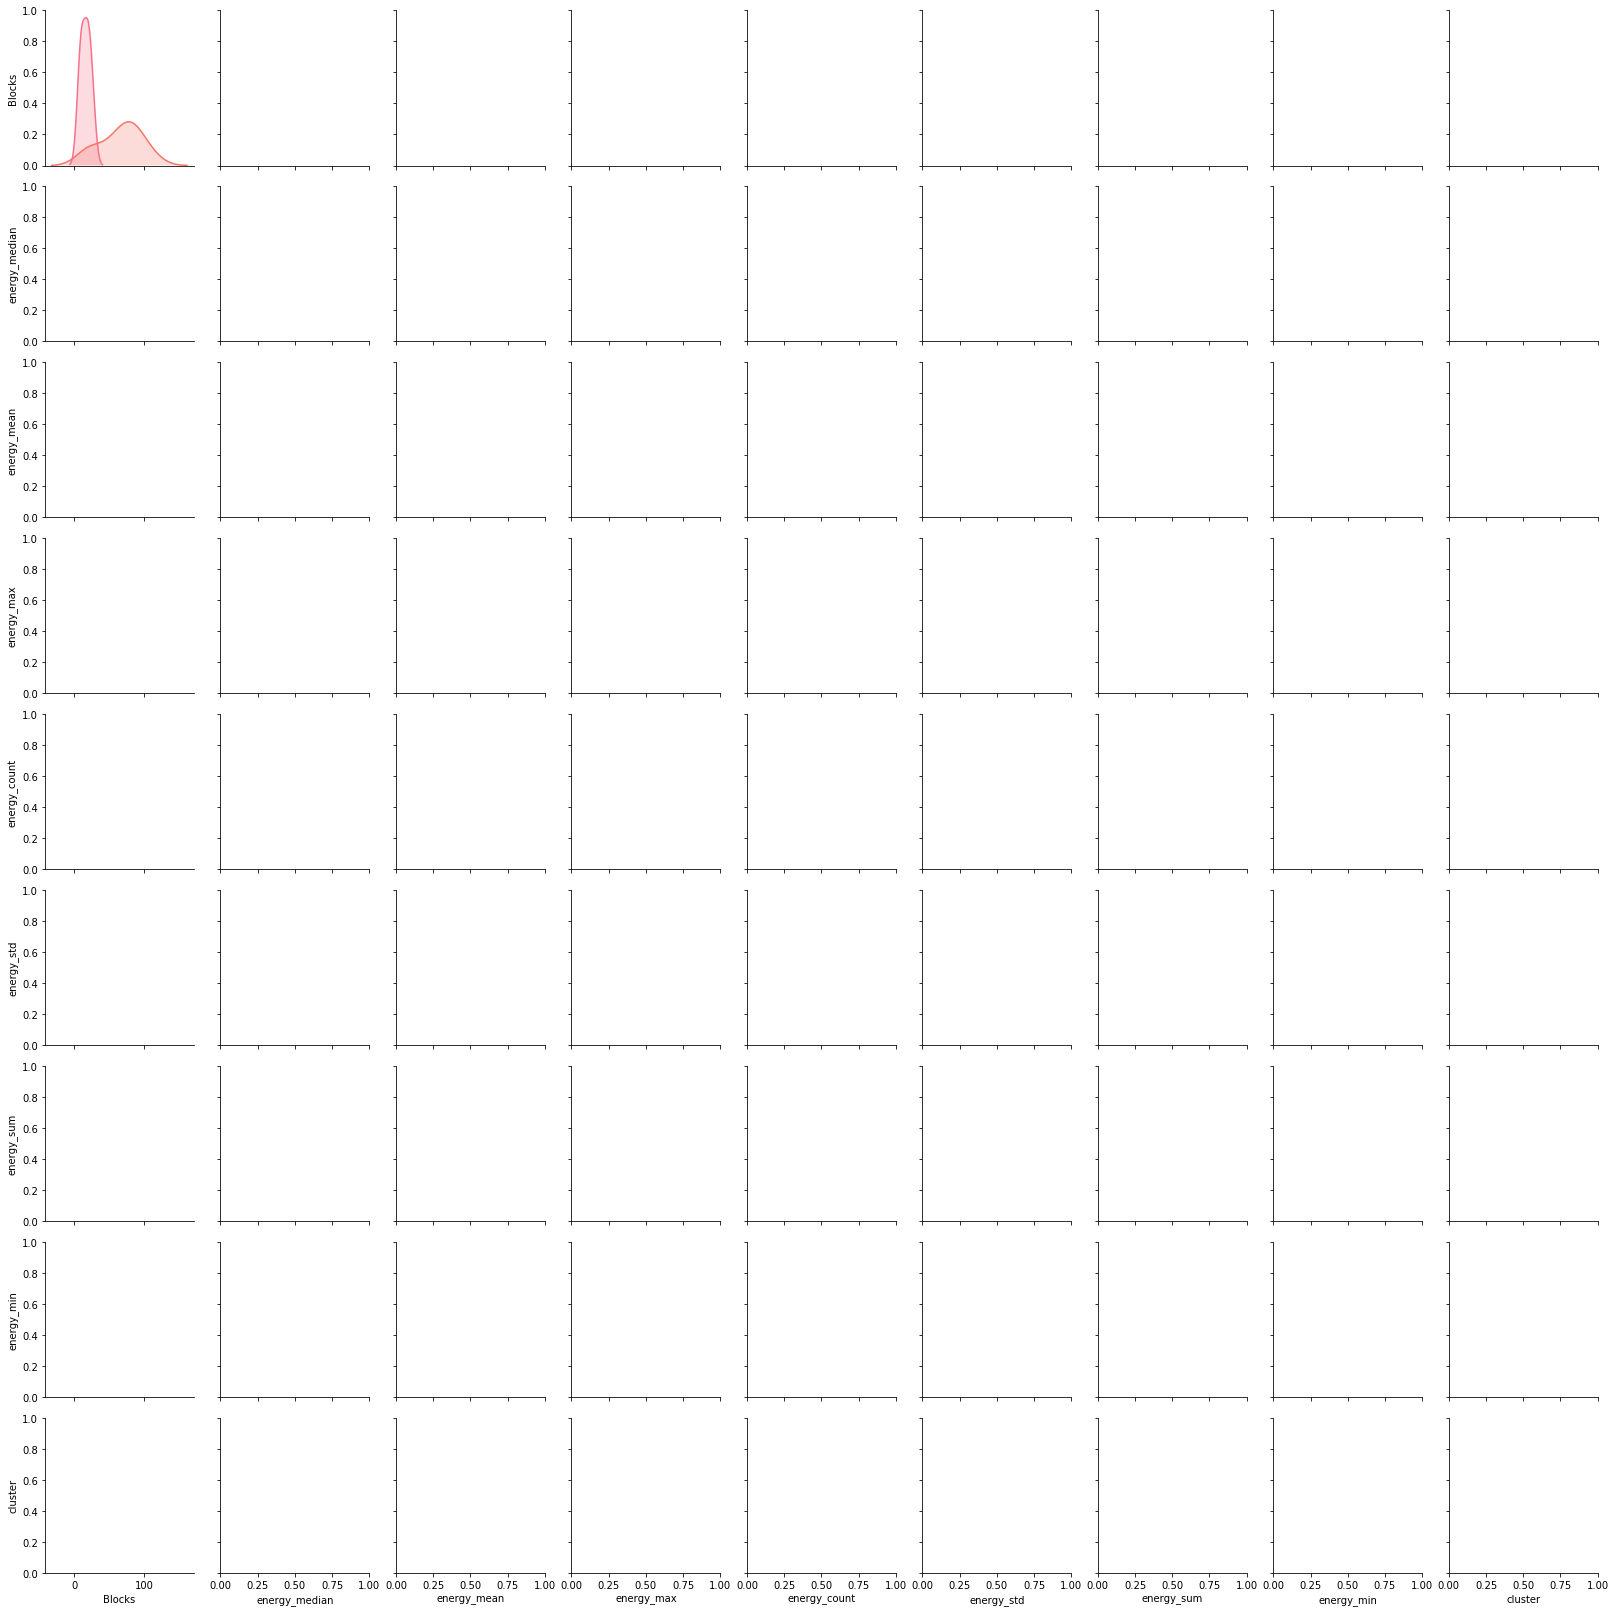

In [20]:
sns.pairplot( df[ cols ], hue="cluster")
